# Coronavirus

* Coronavirus proviene de una enfermedad animal llamada **Zoonosis**. Se transmite entre animales y personas)
* Los sintomas son: fiebre, tos, problemas respiratorios.
* En casos graves, puede causar neumonía, síndrome respiratorios agudos, fallo de los riñones e includo la muerte.

* **Novel Coronavirus (nCoV)** es una nueva cepa que no había sido identificada en humanos anteriormente.

* Causas: **SARS-COV-2** corona virus.  
* Identificado inicialmente en: **Wuhan, Hubei, China**.  
* Los primeros sintomas fueron informados en: **1 Diciember 2019**. 
* Los primeros casos están ligados al contacto con el Mercado de Pescado y Marisco de Huanan. China, en el que se vendían animales vivos.
* El 30 de Enero de 2020 la OMS declaró el brote the Emergencia Pública Internacional.








## Import Libraries

In [194]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
from statistics import mean 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from fbprophet import Prophet
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)





## Import the data (make sure you update this on a daily basis)

In [195]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

## Datos sobre España

In [196]:
spain_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Spain']
spain_deaths_df = deaths_df[deaths_df['Country/Region']=='Spain']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Spain']

In [197]:
cols = spain_confirmed_df.keys()

Get all the dates for the outbreak

In [198]:
confirmed = spain_confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = spain_deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [199]:
# Transpose data
confirm_trans = confirmed.transpose()
recoveries_trans = recoveries.transpose()
deaths_trans = deaths.transpose()

In [200]:
# Rename column
old_names = [18] 
new_names = ['y']
confirm_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)
recoveries_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)
deaths_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)

### Ratio recovered/confirmed cases

In [201]:
rc = recoveries_trans['y'].iloc[-1]/confirm_trans['y'].iloc[-1]*100
print('Ratio recuperados/casos confirmados:', rc, '%')

Ratio recuperados/casos confirmados: 8.750425604358188 %


### Ratio deaths/confirmed cases

In [202]:
rd = deaths_trans['y'].iloc[-1]/confirm_trans['y'].iloc[-1]*100
print('Ratio muertes/casos confirmados:', rd, '%')

Ratio muertes/casos confirmados: 4.536942458290773 %


### Plot cases in Spain

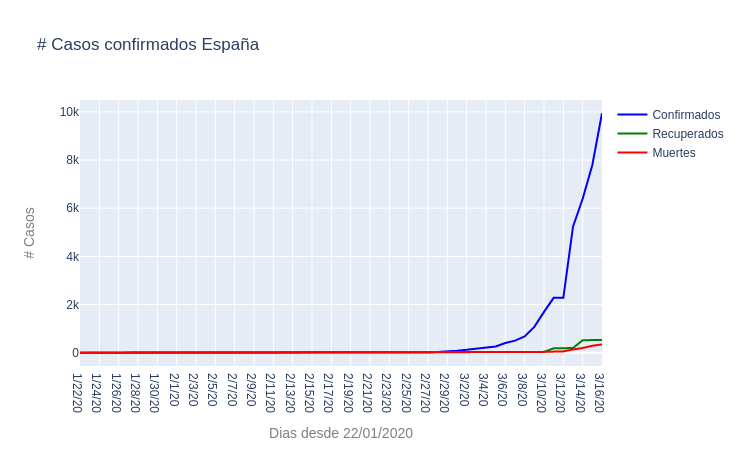

In [203]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)

# line recovered
# data 
x = recoveries_trans_filter.index
y = recoveries_trans_filter['y']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Recuperados"
)

# data 
x = deaths_trans_filter.index
y = deaths_trans_filter['y']

trace2 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
    name="Muertes"
)

# layout
layout = go.Layout(title = "# Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### Confirmed cases logarithmic scale

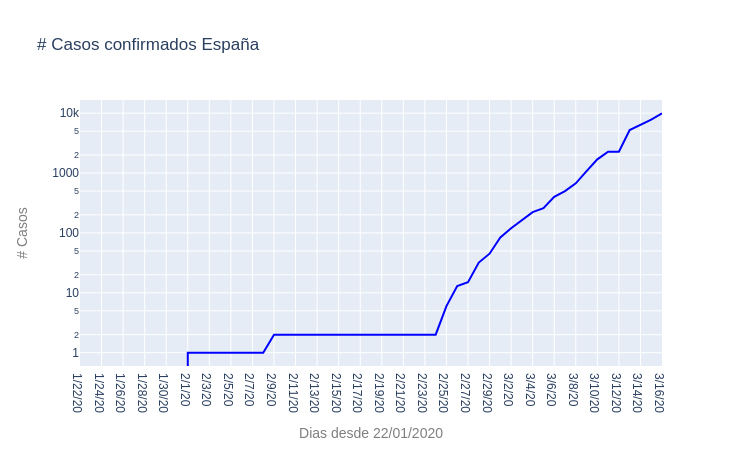

In [204]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)



# layout
layout = go.Layout(title = "# Casos confirmados España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(yaxis_type="log")
iplot(fig)

### Plot recovered cases in Spain

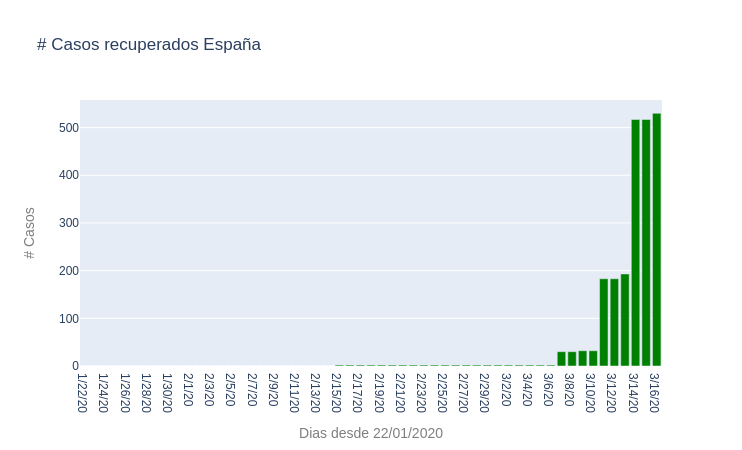

In [97]:
#data 
x = recoveries_trans.index
y = recoveries_trans['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
)


# layout
layout = go.Layout(title = "# Casos recuperados España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Death cases in Spain

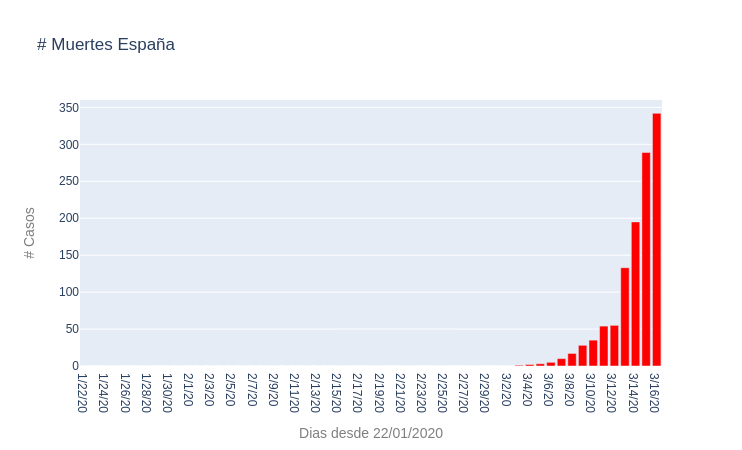

In [98]:
#data 
x = deaths_trans.index
y = deaths_trans['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
)


# layout
layout = go.Layout(title = "# Muertes España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Recovered and deaths

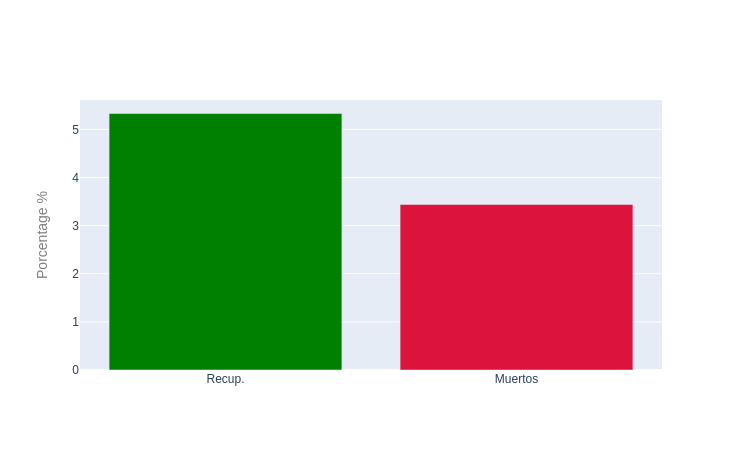

In [99]:
#data 
x = ("Recup.", "Muertos")
y = (rc, rd)

#Colors
colors = ['green',] * 5
colors[1] = 'crimson'

# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=colors
    ),
)


# layout
layout = go.Layout(
    yaxis=dict(title = go.layout.yaxis.Title(text='Porcentage %', 
                                             font=dict(size=14, 
                                             color='#7f7f7f')))
)

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Exponential Growth

In [100]:
# Create column of difference between Nd and Nd-1
confirm_trans['changes'] = confirm_trans.y - confirm_trans.y.shift(1)
confirm_trans.tail()

,y,changes
3/12/20,2277,0.0
3/13/20,5232,2955.0
3/14/20,6391,1159.0
3/15/20,7798,1407.0
3/16/20,9942,2144.0


In [101]:
# Create column of difference between Nd changes and Nd-1 changes
confirm_trans['Growth Factor'] = confirm_trans.changes / confirm_trans.changes.shift(1)
confirm_trans.tail()



,y,changes,Growth Factor
3/12/20,2277,0.0,0.000000
3/13/20,5232,2955.0,inf
3/14/20,6391,1159.0,0.392217
3/15/20,7798,1407.0,1.213978
3/16/20,9942,2144.0,1.523810


In [102]:
# Clean inf data
confirm_trans['Growth Factor'] = confirm_trans['Growth Factor'].replace(np.inf, 0)

### Plot Growth Factor

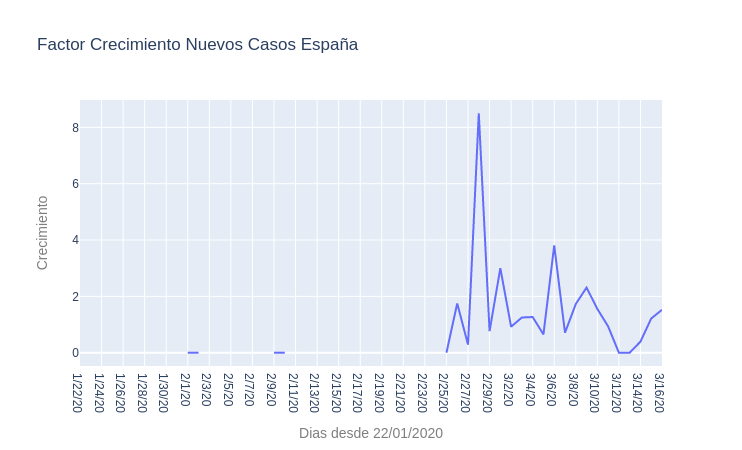

In [127]:
#data 
x = confirm_trans.index
y = confirm_trans['Growth Factor']
#mean = mean(y)

# line
trace = go.Line(
    x=x,
    y=y,
)


# layout
layout = go.Layout(title = "Factor Crecimiento Nuevos Casos España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='Crecimiento', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

In [ ]:
#Create a 100-day series

x2 = []
x = confirm_trans.index.values

for num in range(1,100):
#Get the last date 
    datetime_object = datetime.datetime.strptime(x[-1], '%m/%d/%y') + datetime.timedelta(days=1)
    #Time to string
    d = datetime_object.strftime("%m/%d/%y")
    print(d)

    #Add it to new array
    x2.append(d)

    #Concatenate both arrays
    x = np.concatenate((x, x2))


/home/emi/miniconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




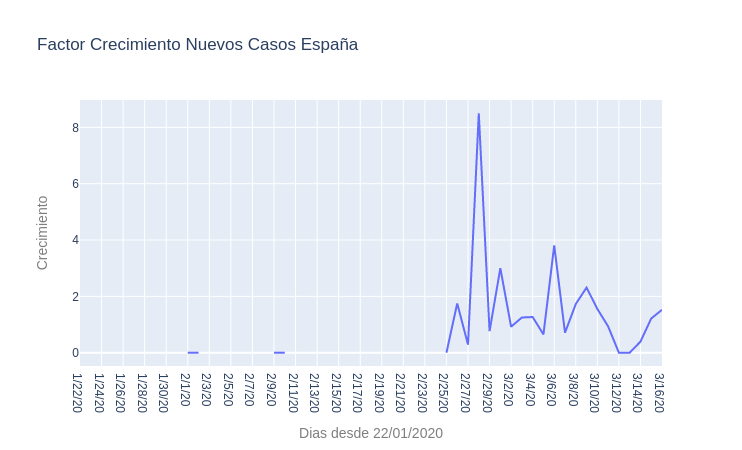

In [117]:
#data 
x = confirm_trans.index
y = confirm_trans['Growth Factor']


# line
trace = go.Line(
    x=x,
    y=y,
)



# layout
layout = go.Layout(title = "Factor Crecimiento Nuevos Casos España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='Crecimiento', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

## Forecasting


## Transform time series data into a supervised learning problem


In [219]:

df = confirm_trans_filter
df['y+1'] = df['y'].shift(-1)

## One-Step Univariate Forecasting

It is standard practice in time series forecasting to use lagged observations (e.g. t-1) as input variables to forecast the current time step (t).

This is called one-step forecasting.


In [ ]:
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
values = df['y'].tolist()
data = series_to_supervised(values)
print(data)

## Persistence Forecast Model
It is important to establish a baseline forecast.

The simplest forecast you can make is to use the current observation (t) to predict the observation at the next time step (t+1).

This is called the naive forecast or the persistence forecast and may be the best possible model on some time series forecast problems.

In [244]:
# persistence model
def model_persistence(x):
    if str(x)=='nan':
        print(x)
        x = 0;
        return x


In [241]:
# split into train and test sets
X = df.values

train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [242]:
X

array([[0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       [

### Make and Evaluate Forecast

In [251]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)